## Importing the basic libraries

In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


## Importing the data set

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


## Refining the data

In [3]:
corpus = [] 

In [4]:
for i in range(0,1000):
    review = df['Review'][i] 
    review = re.sub('[^a-zA-z]', ' ', review) # replacing the punctuations with space
    review = review.lower() 
    review = review.split() 
    ps = PorterStemmer() # creating the object of the porter stemmer class
    all_stopwords = stopwords.words('english') # collecting the english language stop words
    arr=['not','no','didn',"shouldn't",'wasn','weren','won',]
    for i in arr:
        all_stopwords.remove(i)
    all_stopwords.append('order')
    all_stopwords.append('waited')
    all_stopwords.append("bland")
    all_stopwords.append('still')
    all_stopwords.append('place')
    all_stopwords.append('feel')
    all_stopwords.append('buffet')
    all_stopwords.append('food')
    all_stopwords.append('burger')
    all_stopwords.append('kitchen')
    all_stopwords.append('salad')
    review =[ps.stem(word) for word in review if not word in set(all_stopwords)]
    # coverting the list of words back to statement
    review = ' '.join(review)
    corpus.append(review) # collecting the refined reviews
def ob2(ip):
    ip=ip.lower()
    ip=ip.split()
    ip =[ps.stem(word) for word in ip if not word in set(all_stopwords)]
    ip=' '.join(ip)
    return ip
print(len(all_stopwords))
print(all_stopwords)

183
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 've

In [5]:
print(corpus)

['wow love', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti didn tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'not worth time let alon vega', 'not like', 'burritto blah', 'amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought ask', 'hole wall great mexican street taco friendli staff', 'took hour get tabl restaur luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like fri beer decent deal', 'like final blow', 'found accid could not happier', 'seem like good quick grab bit

## creating bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1600)
# using the max_feature parameter of countVectorizer to limit the number of columns in x
z = cv.fit(corpus)
x=cv.transform(corpus).toarray()
y = df.iloc[:,-1].values
len(x[0])

1568

## splitting x and y into training and test set

In [7]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 0)

## creating and training the svm model

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, accuracy_score
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_tr,y_tr)
yt = classifier.predict(x_tr)
acc1=accuracy_score(y_tr,yt)
print(acc1)

0.985


In [9]:
# predicting the output
y_pr = classifier.predict(x_te)

C:\Users\pippa\Downloads\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.875


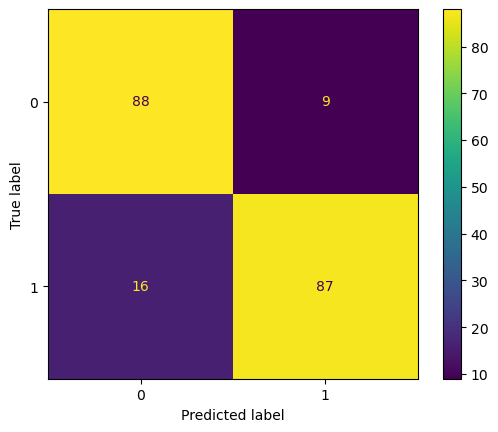

In [10]:
# plotting the confusion matrix and accuracy score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(estimator=classifier,X=x_te, y_true=y_te)
acc = accuracy_score(y_te,y_pr)
print(acc)

In [12]:
b=input('Please give your feedback: ')
s=ob2(b)
f=[]
f.append(s)
d=cv.transform(f).toarray()
c = classifier.predict(d)
print()
if c[0]==1:
    print('Thank you !! visit again.')
else:
    print('We regret for the inconvenience caused , and hope to serve you better next time!!!! ')

Please give your feedback: food is excellent

Thank you !! visit again.
